In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings

import numpy as np

In [125]:
order_df=pd.read_parquet('tezcatli_orders_data.parquet')
# dodge_df=pd.read_excel('Housing Starts Analytics.xlsx')777

In [126]:
order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
order_df=order_df[[ 'Order Create Date',
       'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]

order_df['year'] = order_df['Order Create Date'].dt.year
order_df['month'] = order_df['Order Create Date'].dt.month
order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)

In [127]:
forecast_group='Pr Plk'
order_df_filter=order_df.loc[order_df['forecast_group']==forecast_group]
# order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()

In [128]:
order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'

/tmp/ipykernel_3598/3166445845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'


In [129]:
order_df_filter=order_df_filter.groupby(['date','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()

In [130]:
region='Texas and South Plains'

In [105]:
order_df_filter=order_df_filter[order_df_filter['Region Name']==region]

In [131]:
order_df_filter

,date,Region Name,District Name,Order Volume (STD)
0,2013-10-01,Canada West,Alberta,47505.00
1,2013-10-01,Canada West,British Columbia,475008.00
2,2013-10-01,Carolinas,East Carolinas,1240679.00
3,2013-10-01,Carolinas,Virginia,286374.00
4,2013-10-01,Carolinas,West Carolinas,1185746.92
...,...,...,...,...
5476,2023-7-01,Texas and South Plains,DFW,2231872.50
5477,2023-7-01,Texas and South Plains,Non Metro Texas,733681.50
5478,2023-7-01,Texas and South Plains,South Plains,495690.00
5479,2023-7-01,Texas and South Plains,Southeast Texas,3736366.00


In [132]:
######################################################################### rr data

In [133]:

rr_data=pd.read_csv('r&r.csv')

rr_data=rr_data.drop(['District','District Number','Sub Division','Division'],axis=1)
rr_data['Order Create Date']=pd.to_datetime(rr_data['Calendar Year'])
# region='Midwest Central'
# rr_data=rr_data.loc[rr_data['Region Name']==region]

In [109]:
rr_data=rr_data[rr_data['Region Name']==region]

In [134]:
rr_data=rr_data.groupby(['Order Create Date','Region Name','District Name'])['Project Count'].sum().reset_index()

In [135]:
order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])

In [136]:
order_df_filter=order_df_filter.drop('date',axis=1)

In [137]:
order_df_filter['Order Create Date'].duplicated().sum()

5357

In [138]:
rr_data['Order Create Date'].duplicated().sum()

3864

In [139]:
order_df_filter=order_df_filter.merge(rr_data,on=['Order Create Date','District Name'],how='left')

In [142]:
order_df_filter

,Region Name_x,District Name,Order Volume (STD),Order Create Date,Region Name_y,Project Count
0,Canada West,Alberta,47505.00,2013-10-01,Carolinas,32872.0
1,Canada West,British Columbia,475008.00,2013-10-01,Carolinas,32872.0
2,Carolinas,East Carolinas,1240679.00,2013-10-01,Carolinas,32872.0
3,Carolinas,Virginia,286374.00,2013-10-01,Carolinas,21781.0
4,Carolinas,West Carolinas,1185746.92,2013-10-01,Carolinas,45615.0
...,...,...,...,...,...,...
5476,Texas and South Plains,DFW,2231872.50,2023-07-01,Texas and South Plains,51601.0
5477,Texas and South Plains,Non Metro Texas,733681.50,2023-07-01,Texas and South Plains,55087.0
5478,Texas and South Plains,South Plains,495690.00,2023-07-01,Texas and South Plains,54724.0
5479,Texas and South Plains,Southeast Texas,3736366.00,2023-07-01,Texas and South Plains,47064.0


In [141]:
order_df_filter.fillna(method='ffill',inplace=True)
order_df_filter.fillna(method='bfill',inplace=True)

In [143]:
order_df_filter['Project Count']=order_df_filter['Project Count']/3

In [144]:
order_df_filter.rename({'Region Name_x':'Region Name'},axis=1,inplace=True)

In [145]:
merge_df=order_df_filter

In [152]:
merge_df=merge_df[merge_df['Region Name']==region]
merge_df=merge_df[merge_df['District Name']=='South Plains']

                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.541576
Project Count                 0.541576       1.000000 Texas and South Plains


/tmp/ipykernel_3598/1533505254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


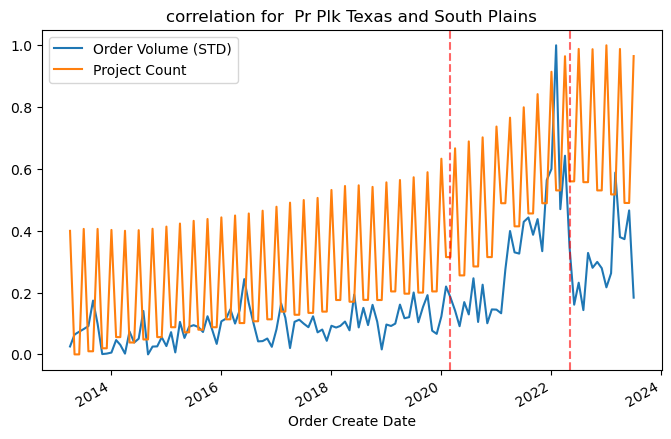

In [153]:
print((merge_df.corr()),region)
ax=merge_df.set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
plt.show()

/tmp/ipykernel_3598/1533505254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.889071
Project Count                 0.889071       1.000000 Carolinas


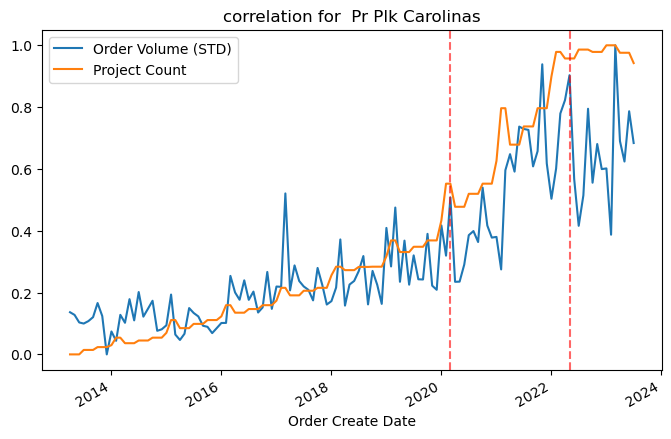

In [60]:
print((merge_df.corr()),region)
ax=merge_df.set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
plt.show()

In [ ]:
################################################################ FUNCTION FOR RR DATA   ########################################################

In [156]:
rr_data=pd.read_csv('r&r.csv')

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.784695
Project Count                 0.784695       1.000000 Carolinas


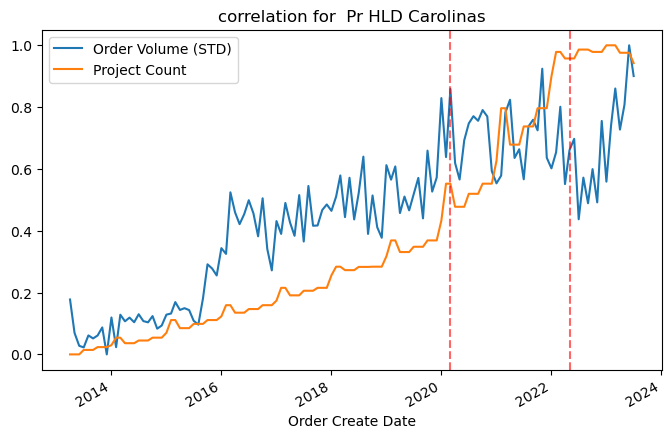

                    Order Volume (STD)  Project Count
Order Volume (STD)                 NaN            NaN
Project Count                      NaN            NaN Canada East


/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


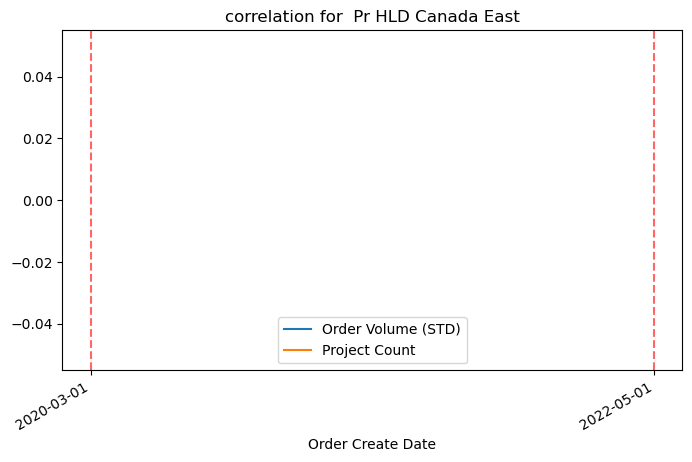

                    Order Volume (STD)  Project Count
Order Volume (STD)                 NaN            NaN
Project Count                      NaN            NaN Canada West


/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


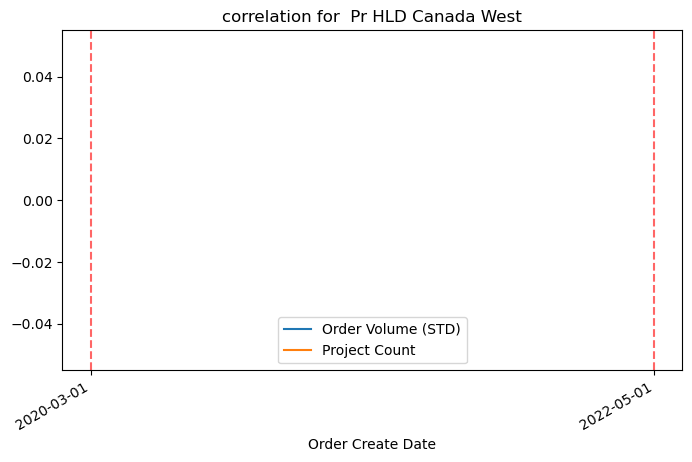

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)                 1.0            NaN
Project Count                      NaN            NaN Mid Atlantic


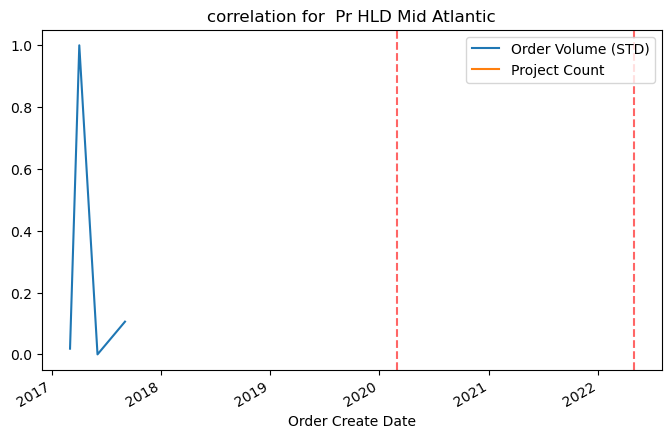

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.918745
Project Count                 0.918745       1.000000 Mid South


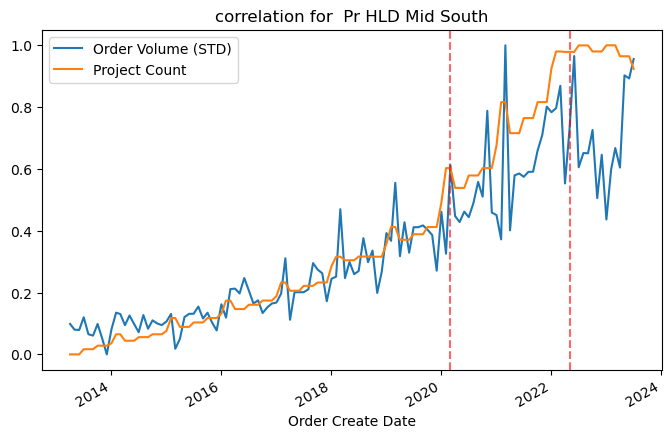

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.047776
Project Count                 0.047776       1.000000 Midwest Central


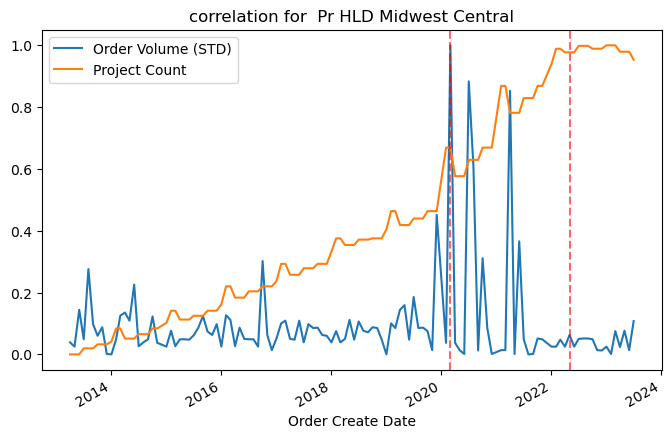

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)                 1.0            NaN
Project Count                      NaN            NaN Midwest East


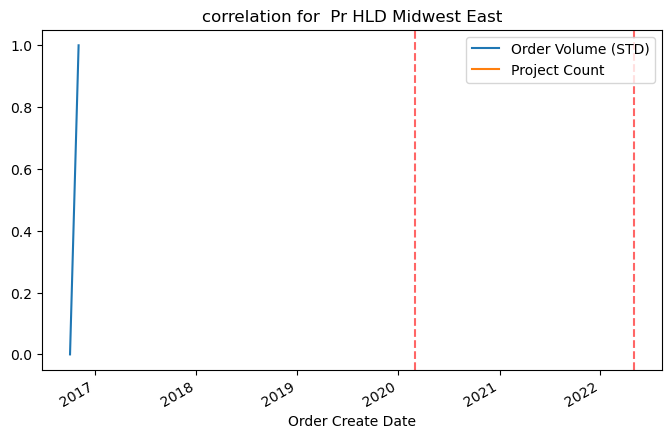

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Region Name_y  Project Count
Order Volume (STD)                 NaN            NaN            NaN
Region Name_y                      NaN            NaN            NaN
Project Count                      NaN            NaN            NaN Midwest West


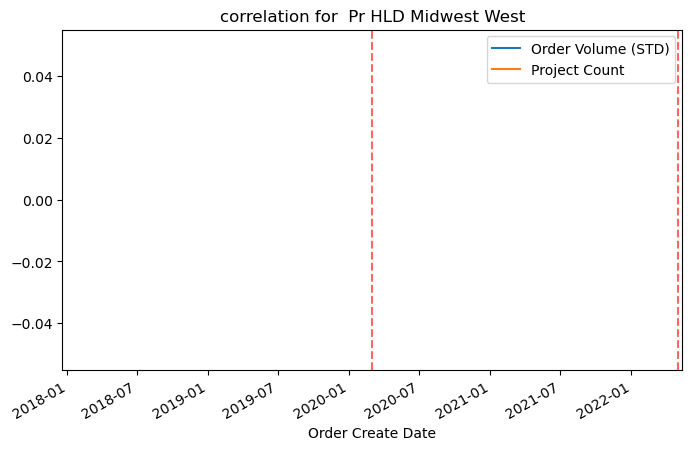

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)                 NaN            NaN
Project Count                      NaN            NaN Mountain


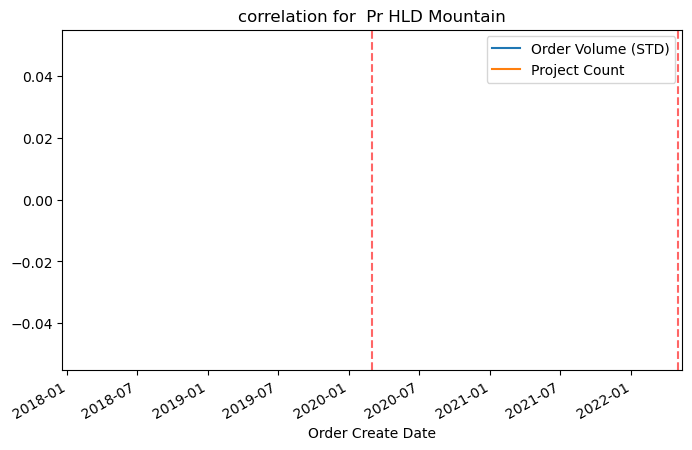

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)                 NaN            NaN
Project Count                      NaN            NaN North Atlantic


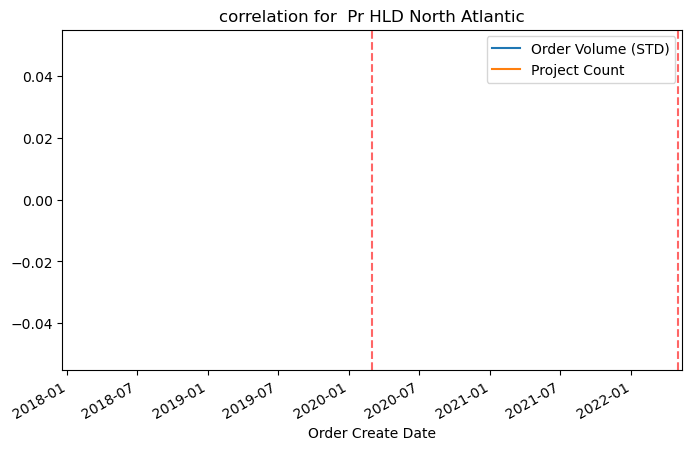

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.230757
Project Count                 0.230757       1.000000 Pacific Northwest


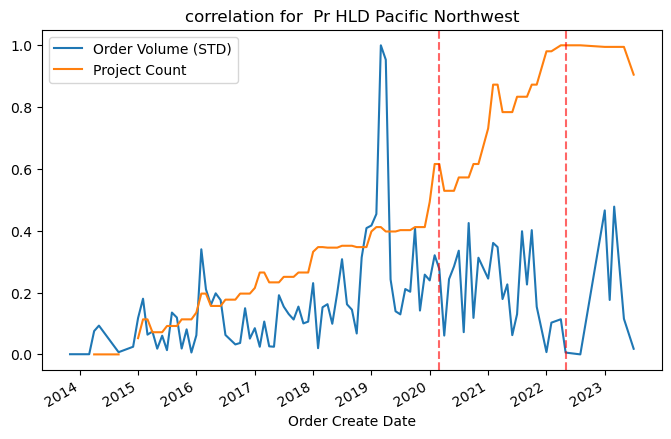

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.911604
Project Count                 0.911604       1.000000 Southeast


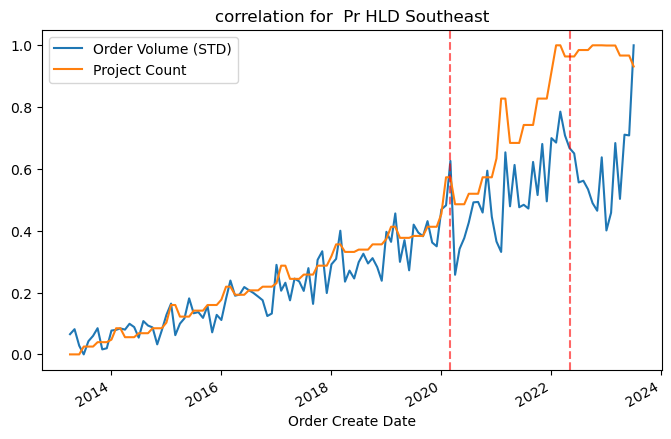

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.815367
Project Count                 0.815367       1.000000 Southwest


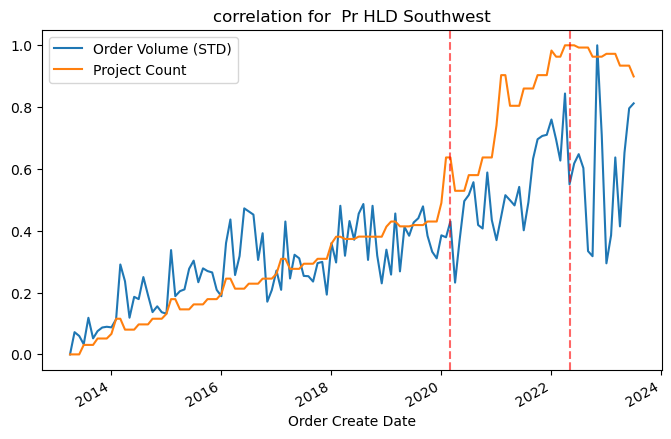

/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


                    Order Volume (STD)  Project Count
Order Volume (STD)            1.000000       0.843055
Project Count                 0.843055       1.000000 Texas and South Plains


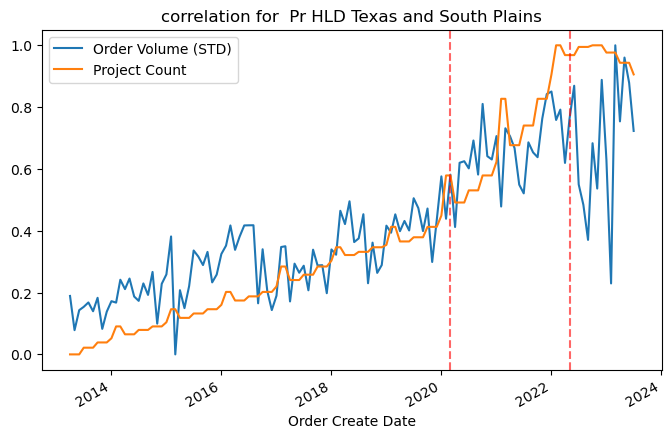

                    Order Volume (STD)  Project Count
Order Volume (STD)                 NaN            NaN
Project Count                      NaN            NaN Alaska


/tmp/ipykernel_3598/1839165143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
/tmp/ipykernel_3598/1839165143.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print((merge_df.corr()),region)


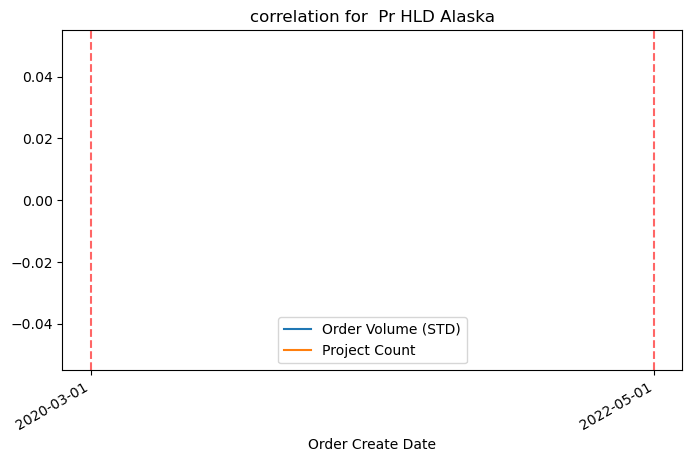

In [158]:
order_df=pd.read_parquet('tezcatli_orders_data.parquet')
order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
order_df=order_df[[ 'Order Create Date',
       'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]
for i in order_df['Region Name'].unique():
       region=i
       order_df['year'] = order_df['Order Create Date'].dt.year
       order_df['month'] = order_df['Order Create Date'].dt.month
       order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)
       forecast_group='Pr HLD'
       order_df_filter=order_df.loc[order_df['forecast_group']==forecast_group]
       order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
       order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()
       order_df_filter=order_df_filter[order_df_filter['Region Name']==region]

       rr_data=pd.read_csv('r&r.csv')
       rr_data=rr_data.drop(['District','District Number','Sub Division','Division'],axis=1)
       rr_data['Order Create Date']=pd.to_datetime(rr_data['Calendar Year'])
       rr_data=rr_data[rr_data['Region Name']==region]
       rr_data=rr_data.groupby(['Order Create Date','Region Name'])['Project Count'].sum().reset_index()
       order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])
       order_df_filter=order_df_filter.drop('date',axis=1)
       order_df_filter=order_df_filter.merge(rr_data,on='Order Create Date',how='left')
       order_df_filter.fillna(method='ffill',inplace=True)
       order_df_filter['Project Count']=order_df_filter['Project Count']/3
       order_df_filter.rename({'Region Name_x':'Region Name'},axis=1,inplace=True)
       merge_df=order_df_filter
       print((merge_df.corr()),region)
       ax=merge_df.set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
       ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
       ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
       # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
       plt.show()

In [242]:
# rr_data=rr_df_date.merge(rr_data,how='left',on=['Order Create Date'])

In [245]:

# rr_data['Project Count']=rr_data['Project Count']/3

In [61]:
# rr_data.isnull().sum()

In [250]:
# rr_data['Project Count'].fillna(method='ffill',inplace=True)
# rr_data['Region Name'].fillna(method='ffill',inplace=True)
# rr_data['Calendar Year'].fillna(method='ffill',inplace=True)
# rr_data['District Name'].fillna(method='ffill',inplace=True)

In [252]:
# order_df=pd.read_parquet('tezcatli_orders_data.parquet')

# order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
# order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
# order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
# order_df=order_df[[ 'Order Create Date',
#        'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]


In [62]:
# forecast_group='Pr Plk'
# order_df['year'] = order_df['Order Create Date'].dt.year
# order_df['month'] = order_df['Order Create Date'].dt.month
# order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)
# order_df_filter=order_df.loc[order_df['forecast_group']==forecast_group]
# # order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()
# order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
# order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()
# order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])

In [254]:
# merge_df=order_df_filter.merge(rr_data,how='left',on=['Order Create Date','Region Name'])

In [63]:

# print((merge_df.loc[merge_df['Region Name']==region].corr()),region)
# ax=merge_df.loc[merge_df['Region Name']==region].set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
# ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
# ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
# # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
# plt.show()

In [64]:
# forecast_group='C+ Dr NT3'
# rr_data=pd.read_csv('r&r.csv')

# rr_data=rr_data.drop(['District','District Number','Sub Division','Division'],axis=1)
# rr_data['Order Create Date']=pd.to_datetime(rr_data['Calendar Year'])
# # region='Midwest Central'
# for i in rr_data['Region Name'].unique():
#        region=i
#        rr_data=rr_data.loc[rr_data['Region Name']==region]
#        start_date = "1999-01-01"
#        end_date = "2024-01-01"
#        date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
#        rr_df_date=pd.DataFrame()
#        rr_df_date['Order Create Date']=date_range
#        rr_data=rr_df_date.merge(rr_data,how='left',on=['Order Create Date'])
#        rr_data['Project Count']=rr_data['Project Count']/3
#        rr_data['Project Count'].fillna(method='ffill',inplace=True)
#        rr_data['Region Name'].fillna(method='ffill',inplace=True)
#        rr_data['Calendar Year'].fillna(method='ffill',inplace=True)
#        rr_data['District Name'].fillna(method='ffill',inplace=True)
#        order_df=pd.read_parquet('tezcatli_orders_data.parquet')
#        order_df['Order Create Date']=pd.to_datetime(order_df['Order Create Date'])
#        order_df=order_df.loc[order_df['Region Name']!='Export/Interco']
#        order_df=order_df.loc[order_df['Product Segment'].isin(['Exterior','Interior'])]
#        order_df=order_df[[ 'Order Create Date',
#        'Region Name', 'District Name', 'forecast_group', 'Order Volume (STD)']]
#        forecast_group='Pr Plk'
#        order_df=order_df[order_df['Region Name']==region]
#        order_df['year'] = order_df['Order Create Date'].dt.year
#        order_df['month'] = order_df['Order Create Date'].dt.month
#        order_df=order_df.sort_values(by='Order Create Date').reset_index(drop=True)
#        order_df_filter=order_df.loc[order_df['forecast_group']==forecast_group]
#        # order_df_filter=order_df_filter.groupby(['Calendar Year','Region Name','District Name'])['Order Volume (STD)'].sum().reset_index()
#        order_df_filter['date']=order_df_filter['year'].astype('str') + '-'+order_df_filter['month'].astype('str') +'-01'
#        order_df_filter=order_df_filter.groupby(['date','Region Name'])['Order Volume (STD)'].sum().reset_index()
#        order_df_filter['Order Create Date']=pd.to_datetime(order_df_filter['date'])
#        merge_df=order_df_filter.merge(rr_data,how='left',on=['Order Create Date','Region Name'])
#        print((merge_df.loc[merge_df['Region Name']==region].corr()),region)
#        ax=merge_df.loc[merge_df['Region Name']==region].set_index('Order Create Date')[['Order Volume (STD)','Project Count']].apply(lambda x:(x-x.min())/(x.max()-x.min())).plot(figsize=(8,5),title=f'correlation for  {forecast_group} {region}')
#        ax.axvline(x='2020-03-01',color='red', alpha = 0.6,linestyle='dashed')
#        ax.axvline(x='2022-05-01',color='red', alpha = 0.6,linestyle='dashed')
#        # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Adjust the rotation angle as needed
#        plt.show()